In [ ]:
!pip install numpy pandas scikit-learn tensorflow keras imbalanced-learn gensim optuna transformers biopython
! pip install pandas numpy matplotlib scipy biopython
!pip install numpy pandas scikit-learn tensorflow imbalanced-learn optuna
!pip install pandas numpy scikit-learn keras hyperopt seaborn matplotlib biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.5 MB/s eta 0:00:00


KNN


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object
KNN Accuracy: 1.0000
Confusion Matrix:
[[ 2  0]
 [ 0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        10

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

ROC AUC: 1.0000


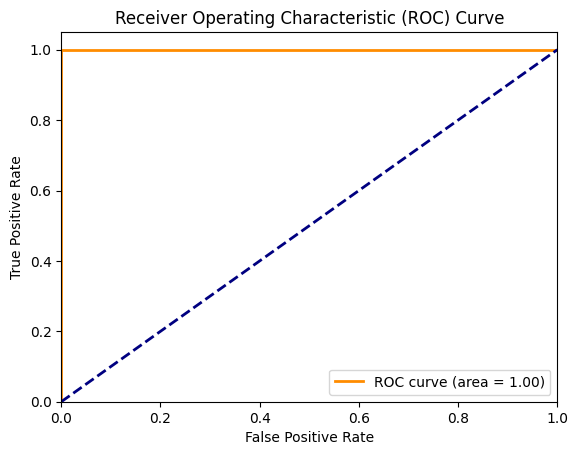

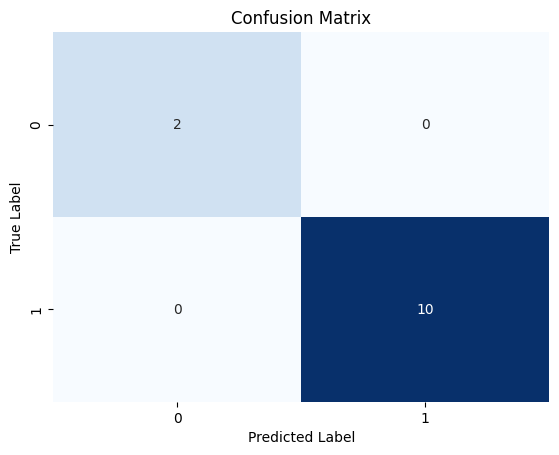

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)  # Check data types of each column

# Identify categorical columns (including 'Label' if it needs encoding)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'Label' is in the list and remove it if necessary
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')  # Remove 'Label' if it's your target variable

# Handle non-numerical columns using OneHotEncoder
# OneHotEncoder is generally preferred for categorical features with no ordinal relationship
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')  # Add prefix to encoded column names

# Concatenate encoded data with original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']  # Use the encoded target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNeighborsClassifier model
knn = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test)
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Confusion Matrix:\n{cm_knn}")
print(f"Classification Report:\n{report_knn}")
print(f"ROC AUC: {roc_auc_knn:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object
KNN Accuracy: 1.0000
Confusion Matrix:
[[ 2  0]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        16

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

ROC AUC: 1.0000


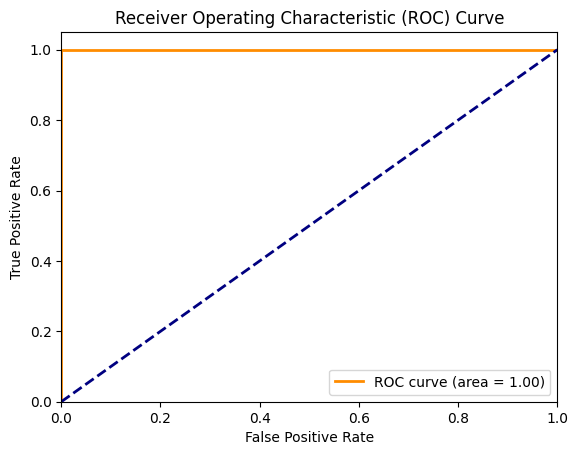

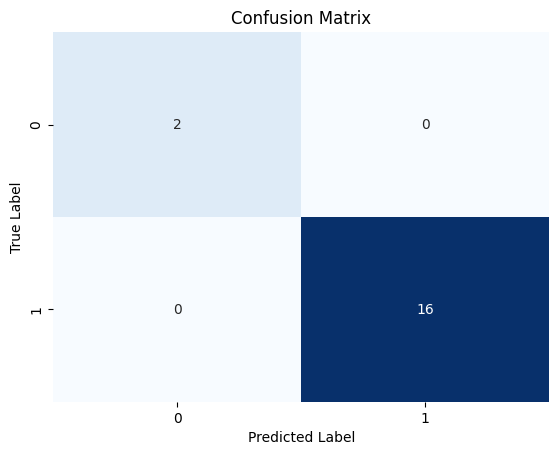

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)  # Check data types of each column

# Identify categorical columns (including 'Label' if it needs encoding)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'Label' is in the list and remove it if necessary
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')  # Remove 'Label' if it's your target variable

# Handle non-numerical columns using OneHotEncoder
# OneHotEncoder is generally preferred for categorical features with no ordinal relationship
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')  # Add prefix to encoded column names

# Concatenate encoded data with original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']  # Use the encoded target variable

# Split the data into training and testing sets using stratified sampling
# Check if stratification is possible
if np.min(np.bincount(y)) >= 2:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
else:
    print("Stratification is not possible. Using random splitting.")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

# Define hyperparameters for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNeighborsClassifier model
knn = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test)

# Check the shape of predict_proba output
proba_shape = best_knn.predict_proba(X_test).shape

# Handle the case of single-column output
if proba_shape[1] == 1:
    y_proba_knn = best_knn.predict_proba(X_test)[:, 0]  # Use the first (and only) column
else:
    y_proba_knn = best_knn.predict_proba(X_test)[:, 1]  # Use the second column as intended

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Confusion Matrix:\n{cm_knn}")
print(f"Classification Report:\n{report_knn}")
print(f"ROC AUC: {roc_auc_knn:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object
Stratification is not possible. Using random splitting.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. nan nan  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn

KNN Accuracy: 0.8889
Confusion Matrix:
[[0 1]
 [0 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

ROC AUC: 0.5000


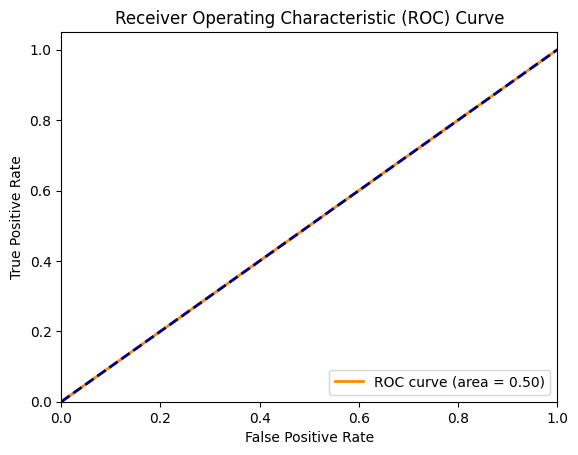

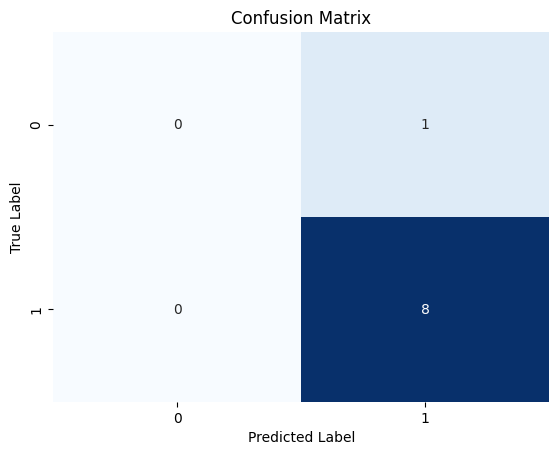

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)  # Check data types of each column

# Identify categorical columns (including 'Label' if it needs encoding)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'Label' is in the list and remove it if necessary
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')  # Remove 'Label' if it's your target variable

# Handle non-numerical columns using OneHotEncoder
# OneHotEncoder is generally preferred for categorical features with no ordinal relationship
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')  # Add prefix to encoded column names

# Concatenate encoded data with original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']  # Use the encoded target variable

# Split the data into training and testing sets using stratified sampling
# Check if stratification is possible
if np.min(np.bincount(y)) >= 2:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
else:
    print("Stratification is not possible. Using random splitting.")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

# Define hyperparameters for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNeighborsClassifier model
knn = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test)

# Check the shape of predict_proba output
proba_shape = best_knn.predict_proba(X_test).shape

# Handle the case of single-column output
if proba_shape[1] == 1:
    y_proba_knn = best_knn.predict_proba(X_test)[:, 0]  # Use the first (and only) column
else:
    y_proba_knn = best_knn.predict_proba(X_test)[:, 1]  # Use the second column as intended

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Confusion Matrix:\n{cm_knn}")
print(f"Classification Report:\n{report_knn}")
print(f"ROC AUC: {roc_auc_knn:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object
KNN Accuracy: 0.6875
Confusion Matrix:
[[7 0]
 [5 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       1.00      0.44      0.62         9

    accuracy                           0.69        16
   macro avg       0.79      0.72      0.68        16
weighted avg       0.82      0.69      0.67        16

ROC AUC: 1.0000


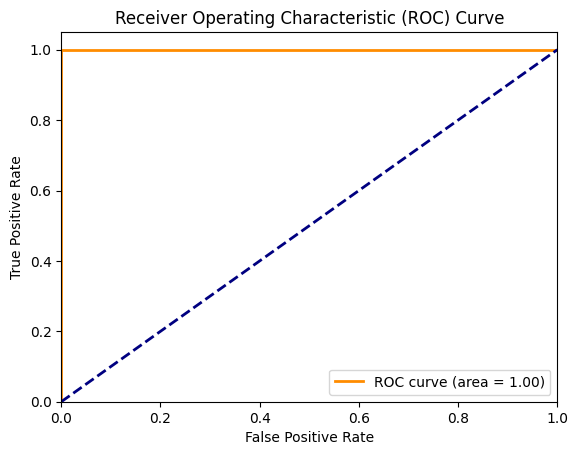

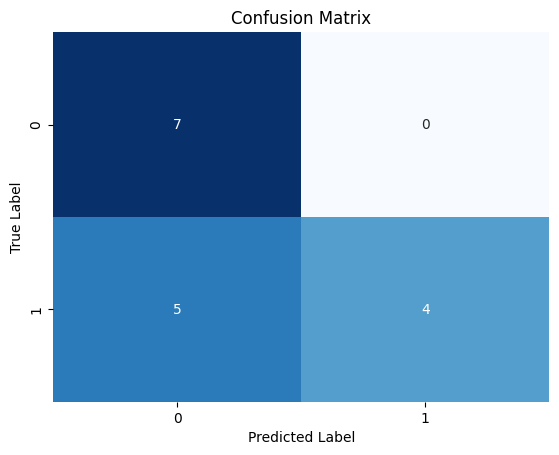

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)

# Identify categorical columns (excluding 'Label')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')

# One-Hot Encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']

# Handle class imbalance
# Initial oversampling with RandomOverSampler to ensure at least 2 samples in minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Further balance the dataset with SMOTE if applicable
unique, counts = np.unique(y_resampled, return_counts=True)
if min(counts) > 1:  # Check if SMOTE can be applied
    smote = SMOTE(random_state=42, k_neighbors=min(counts)-1)
    X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define hyperparameters for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNeighborsClassifier model
knn = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test)

# Check the shape of predict_proba output
proba_shape = best_knn.predict_proba(X_test).shape

# Handle the case of single-column output
if proba_shape[1] == 1:
    y_proba_knn = best_knn.predict_proba(X_test)[:, 0]  # Use the first (and only) column
else:
    y_proba_knn = best_knn.predict_proba(X_test)[:, 1]  # Use the second column as intended

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Confusion Matrix:\n{cm_knn}")
print(f"Classification Report:\n{report_knn}")
print(f"ROC AUC: {roc_auc_knn:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object
KNN Accuracy: 0.9375
Confusion Matrix:
[[8 0]
 [1 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.88      0.93         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16

ROC AUC: 0.9375


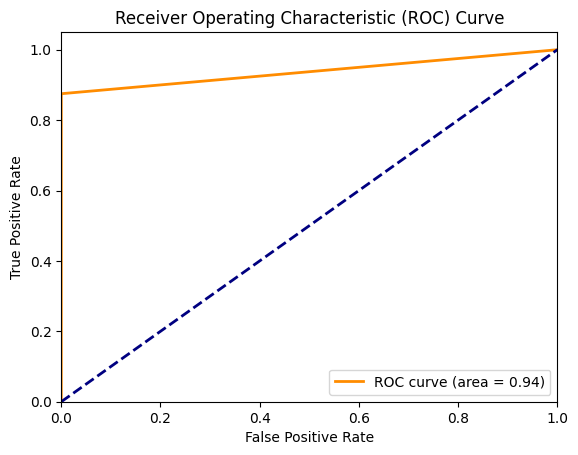

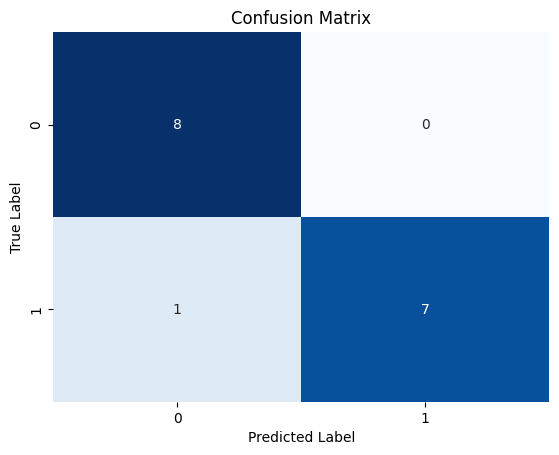

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)

# Identify categorical columns (excluding 'Label')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')

# One-Hot Encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance
# Initial oversampling with RandomOverSampler to ensure at least 2 samples in minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

# Further balance the dataset with SMOTE if applicable
unique, counts = np.unique(y_resampled, return_counts=True)
if min(counts) > 1:  # Check if SMOTE can be applied
    smote = SMOTE(random_state=42, k_neighbors=min(counts)-1)
    X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Define hyperparameters for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNeighborsClassifier model
knn = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test)

# Check the shape of predict_proba output
proba_shape = best_knn.predict_proba(X_test).shape

# Handle the case of single-column output
if proba_shape[1] == 1:
    y_proba_knn = best_knn.predict_proba(X_test)[:, 0]  # Use the first (and only) column
else:
    y_proba_knn = best_knn.predict_proba(X_test)[:, 1]  # Use the second column as intended

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Confusion Matrix:\n{cm_knn}")
print(f"Classification Report:\n{report_knn}")
print(f"ROC AUC: {roc_auc_knn:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


DECISION TREE

Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object
Decision Tree Accuracy: 1.0000
Confusion Matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

ROC AUC: 1.0000


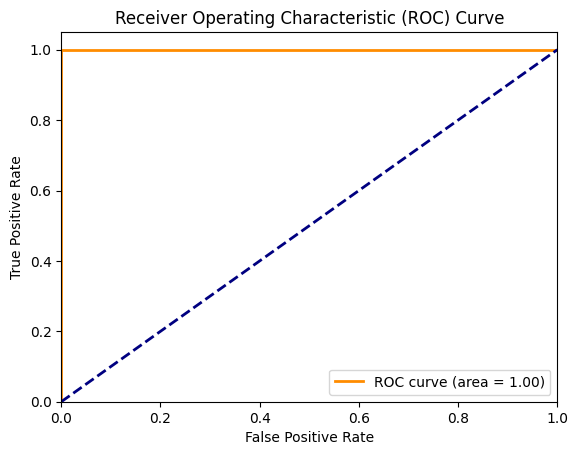

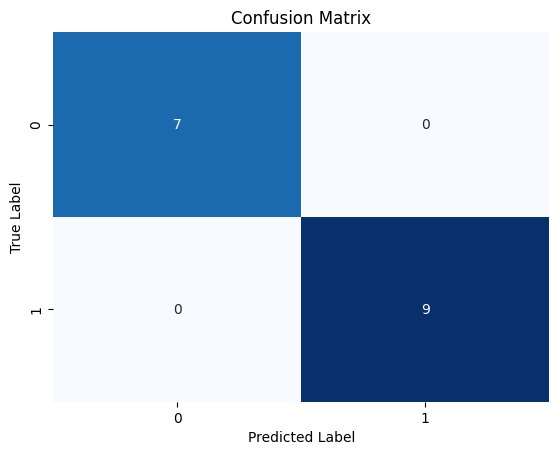

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)

# Identify categorical columns (excluding 'Label')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')

# One-Hot Encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']

# Handle class imbalance
# Initial oversampling with RandomOverSampler to ensure at least 2 samples in the minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Further balance the dataset with SMOTE if applicable
unique, counts = np.unique(y_resampled, return_counts=True)
if min(counts) > 1:  # Check if SMOTE can be applied
    smote = SMOTE(random_state=42, k_neighbors=min(counts)-1)
    X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define hyperparameters for DecisionTreeClassifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize DecisionTreeClassifier model
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(dt, param_grid=param_grid_dt, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Confusion Matrix:\n{cm_dt}")
print(f"Classification Report:\n{report_dt}")
print(f"ROC AUC: {roc_auc_dt:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object
Decision Tree Accuracy: 1.0000
Confusion Matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

ROC AUC: 1.0000


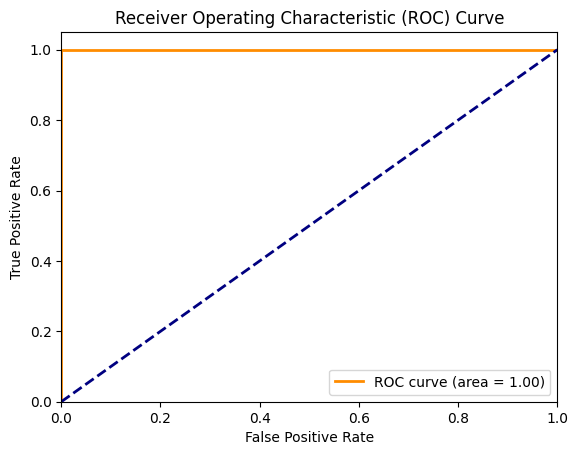

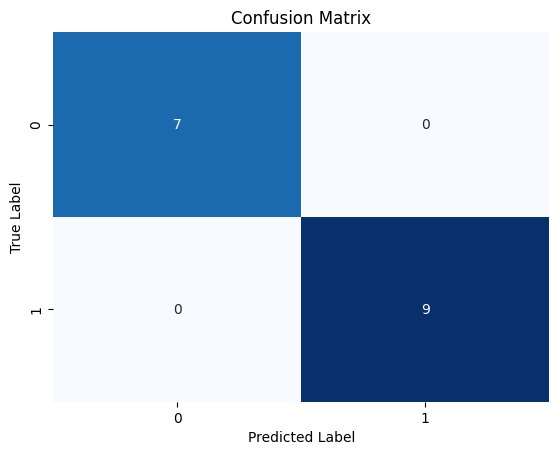

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)

# Identify categorical columns (excluding 'Label')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')

# One-Hot Encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']

# Handle class imbalance
# Initial oversampling with RandomOverSampler to ensure at least 2 samples in minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Further balance the dataset with SMOTE if applicable
unique, counts = np.unique(y_resampled, return_counts=True)
if min(counts) > 1:  # Check if SMOTE can be applied
    smote = SMOTE(random_state=42, k_neighbors=min(counts)-1)
    X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define hyperparameters for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(dt, param_grid=param_grid_dt, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Confusion Matrix:\n{cm_dt}")
print(f"Classification Report:\n{report_dt}")
print(f"ROC AUC: {roc_auc_dt:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object
Decision Tree Accuracy: 1.0000
Confusion Matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

ROC AUC: 1.0000


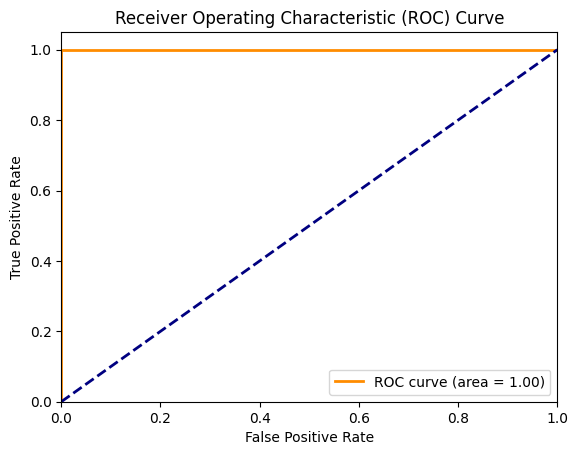

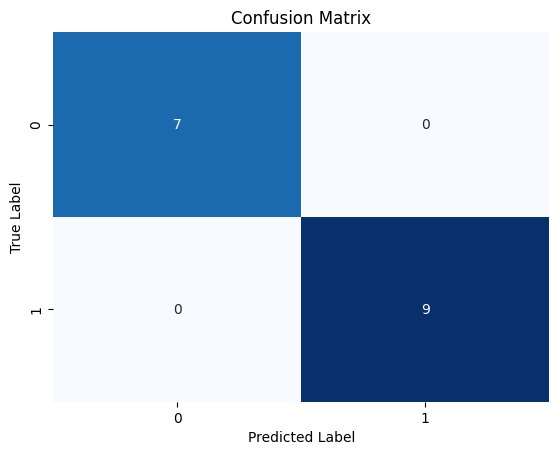

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)

# Identify categorical columns (excluding 'Label')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')

# One-Hot Encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']

# Handle class imbalance
# Initial oversampling with RandomOverSampler to ensure at least 2 samples in minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Further balance the dataset with SMOTE if applicable
unique, counts = np.unique(y_resampled, return_counts=True)
if min(counts) > 1:  # Check if SMOTE can be applied
    smote = SMOTE(random_state=42, k_neighbors=min(counts)-1)
    X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define hyperparameters for Decision Tree with stricter constraints
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 10],  # Limiting max depth to avoid overfitting
    'min_samples_split': [10, 20, 30],  # Increase min_samples_split to avoid overfitting
    'min_samples_leaf': [5, 10, 20],  # Increase min_samples_leaf to avoid overfitting
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(dt, param_grid=param_grid_dt, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Confusion Matrix:\n{cm_dt}")
print(f"Classification Report:\n{report_dt}")
print(f"ROC AUC: {roc_auc_dt:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


NAIVE BAYES

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)

# Identify categorical columns (excluding 'Label')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')

# One-Hot Encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']

# Handle class imbalance
# Initial oversampling with RandomOverSampler to ensure at least 2 samples in minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Further balance the dataset with SMOTE if applicable
unique, counts = np.unique(y_resampled, return_counts=True)
if min(counts) > 1:  # Check if SMOTE can be applied
    smote = SMOTE(random_state=42, k_neighbors=min(counts)-1)
    X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize Naive Bayes model
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Confusion Matrix:\n{cm_nb}")
print(f"Classification Report:\n{report_nb}")
print(f"ROC AUC: {roc_auc_nb:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
